In [3]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]
Numpy: 1.24.2
Pandas: 2.1.2
Matplotlib: 3.8.4
Seaborn: 0.13.2
Scipy: 1.13.1
Sklearn: 1.5.0


In [30]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load dataset
data = pd.read_csv("creditcard.csv")

In [32]:
# Explore the Dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [33]:
print(data.shape)

(284807, 31)


In [34]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [35]:
data = data.sample(frac=0.5, random_state=1)
print(data.shape)

(142404, 31)


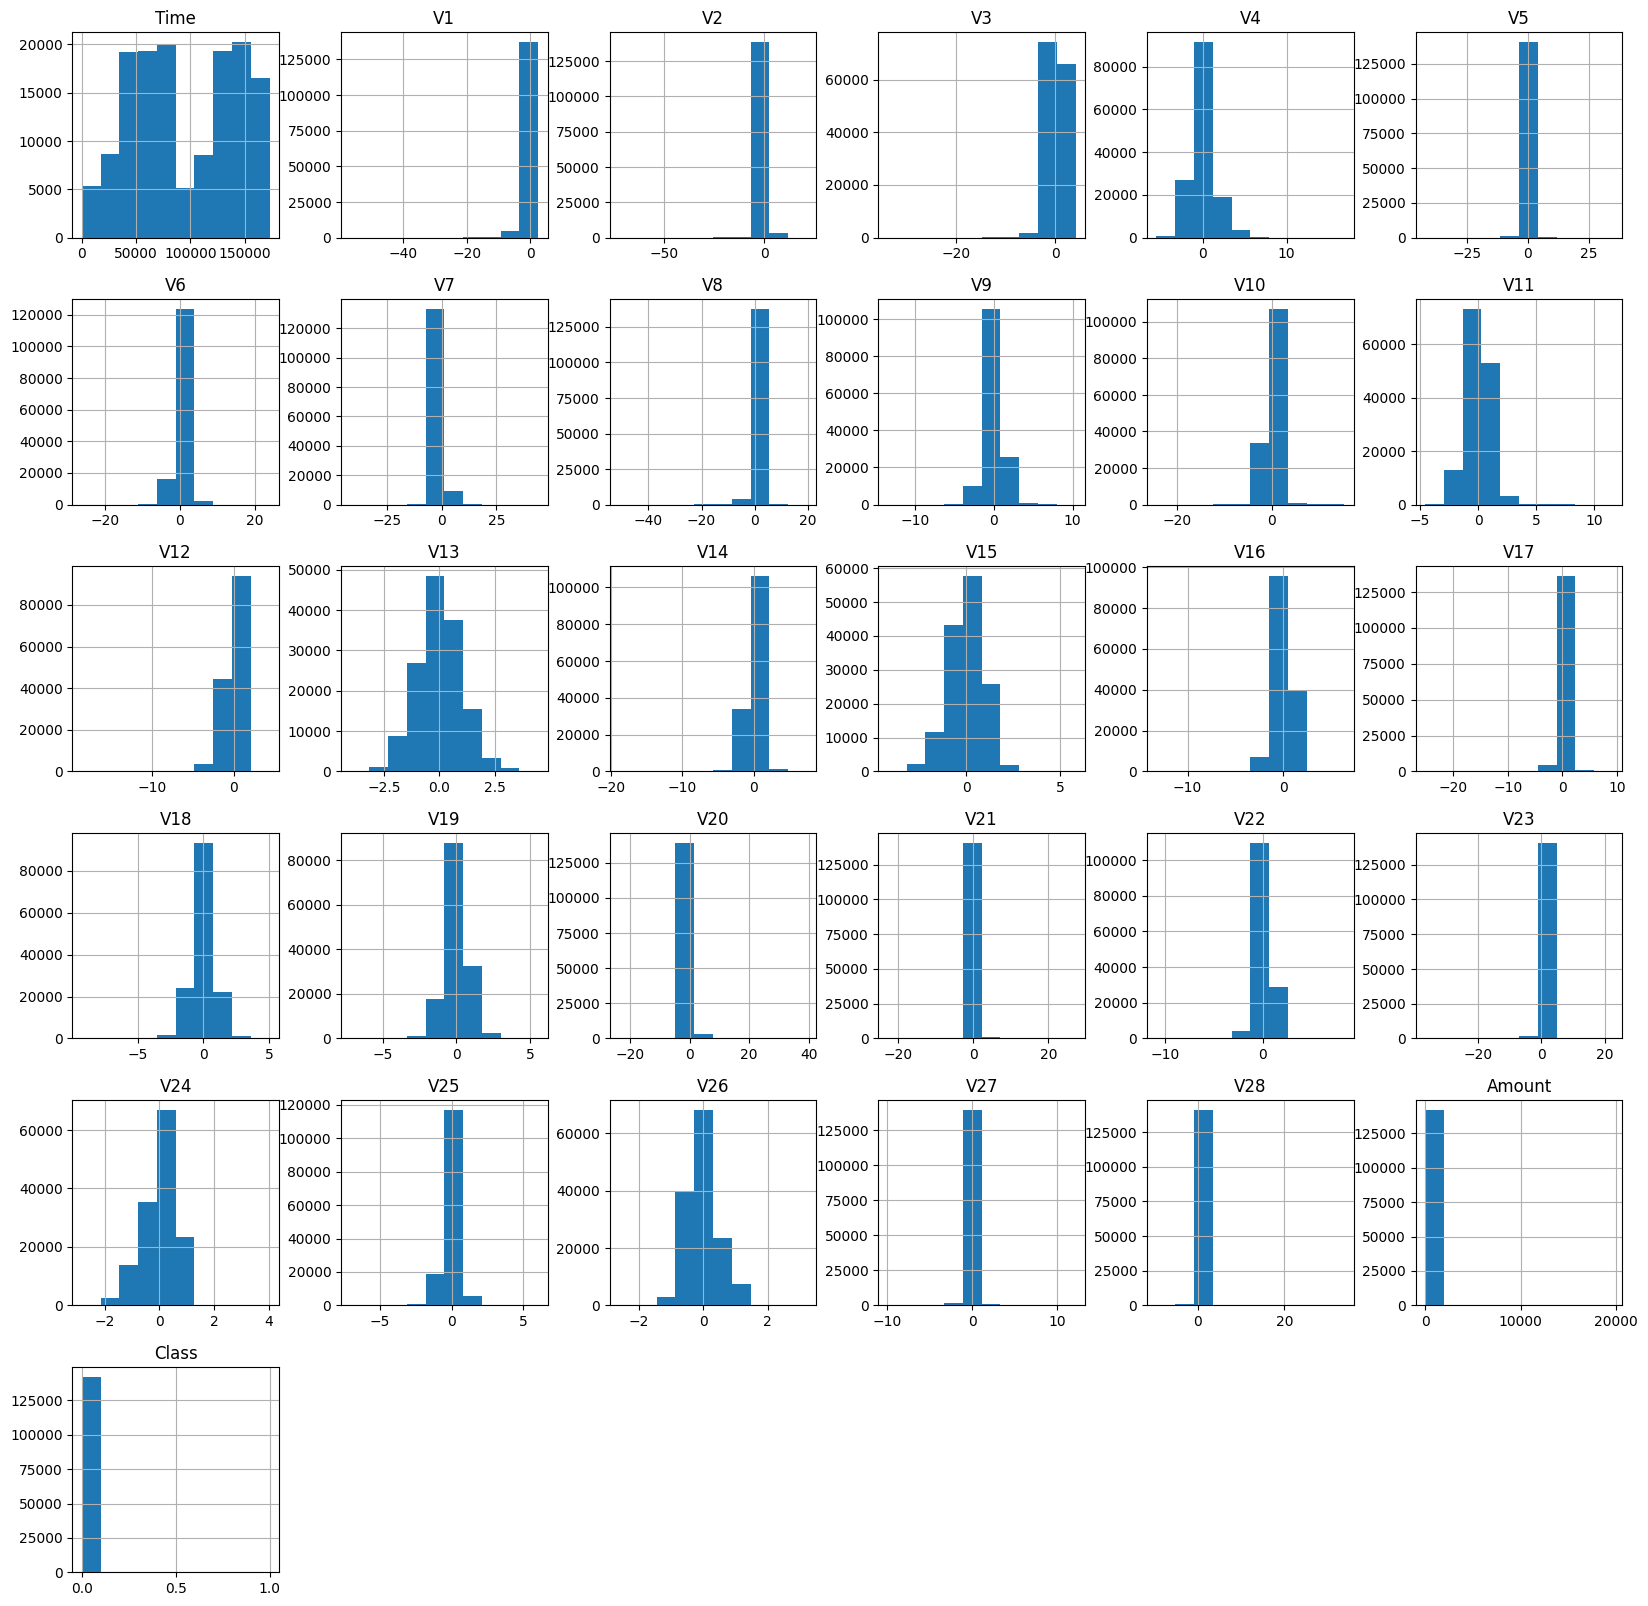

In [36]:
# Plot histogram
data.hist(figsize=(20,20))
plt.show()

In [37]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0015966014193575613
Fraud Cases: 227
Valid Cases: 142177


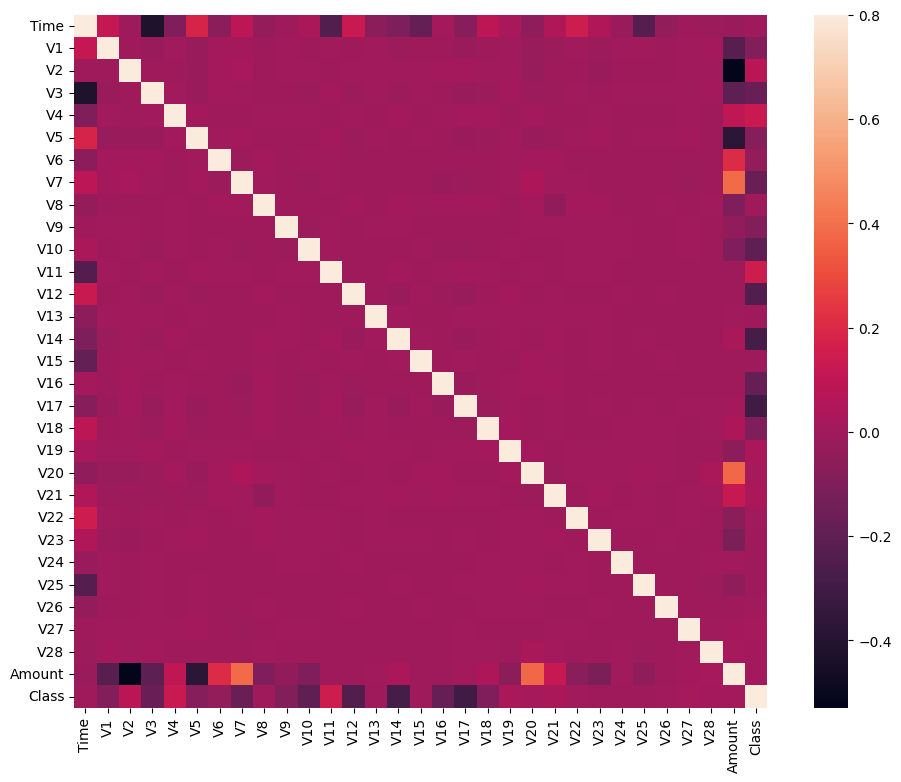

In [38]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax=0.8,square= True)
plt.show()

In [39]:
# Get all columns from data
columns = data.columns.tolist()

# Filter columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store variable we will be predicting
target = "Class"

X = data[columns]
Y = data[target]

# Print shape of X and Y
print(X.shape)
print(Y.shape)

(142404, 30)
(142404,)


In [40]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random state
state = 1

# define outlier detection methods
classifiers = {
    "Isolation Forest":IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state= state),

    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               contamination = outlier_fraction
                                               )
}

In [41]:
# Fitting the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run classification metrics
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest:321
0.9977458498356788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.29      0.30      0.29       227

    accuracy                           1.00    142404
   macro avg       0.65      0.65      0.65    142404
weighted avg       1.00      1.00      1.00    142404

Local Outlier Factor:439
0.9969172214263644
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.04      0.04      0.04       227

    accuracy                           1.00    142404
   macro avg       0.52      0.52      0.52    142404
weighted avg       1.00      1.00      1.00    142404

